## Cafe Sales - dirty datasets


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
datasets = pd.read_csv('dirty_cafe_sales.csv')
df = pd.DataFrame(datasets)
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [ ]:
df['Transaction Date'].value_counts()

Transaction Date
UNKNOWN       159
ERROR         142
2023-06-16     40
2023-02-06     40
2023-09-21     39
             ... 
2023-11-24     15
2023-07-30     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: count, Length: 367, dtype: int64

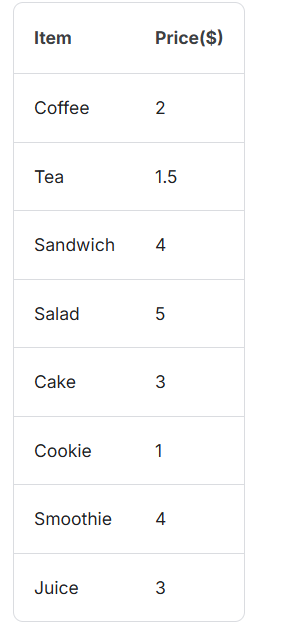

In [ ]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
UNKNOWN     164
Name: count, dtype: int64

In [ ]:
df['Total Spent'].value_counts()

Total Spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
UNKNOWN    165
ERROR      164
Name: count, dtype: int64

In [ ]:
df['Quantity'].value_counts()

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [ ]:
error_price = (df['Price Per Unit']  == 'UNKNOWN' ) | (df['Price Per Unit']  == 'ERROR' )
df[error_price]


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
68,TXN_8427104,Salad,2,ERROR,10.0,NaN,In-store,2023-10-27
140,TXN_2484241,Cake,3,UNKNOWN,9.0,Digital Wallet,NaN,2023-07-19
147,TXN_9336980,Salad,4,UNKNOWN,20.0,Cash,In-store,2023-06-06
161,TXN_7965998,Juice,1,UNKNOWN,3.0,Credit Card,In-store,2023-11-02
162,TXN_9238666,Cookie,1,UNKNOWN,1.0,ERROR,Takeaway,2023-07-31
...,...,...,...,...,...,...,...,...
9753,TXN_3507013,Juice,1,ERROR,3.0,Digital Wallet,In-store,2023-01-16
9755,TXN_3092390,Sandwich,3,UNKNOWN,12.0,NaN,In-store,2023-07-24
9796,TXN_8191202,Cookie,2,UNKNOWN,2.0,Digital Wallet,In-store,2023-01-14
9926,TXN_2464706,Cake,4,UNKNOWN,12.0,Digital Wallet,Takeaway,2023-11-09


In [ ]:
give_price = df[error_price].replace(['UNKNOWN','ERROR'],None)

In [ ]:
give_price

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
68,TXN_8427104,Salad,2,None,10.0,NaN,In-store,2023-10-27
140,TXN_2484241,Cake,3,None,9.0,Digital Wallet,NaN,2023-07-19
147,TXN_9336980,Salad,4,None,20.0,Cash,In-store,2023-06-06
161,TXN_7965998,Juice,1,None,3.0,Credit Card,In-store,2023-11-02
162,TXN_9238666,Cookie,1,None,1.0,None,Takeaway,2023-07-31
...,...,...,...,...,...,...,...,...
9753,TXN_3507013,Juice,1,None,3.0,Digital Wallet,In-store,2023-01-16
9755,TXN_3092390,Sandwich,3,None,12.0,NaN,In-store,2023-07-24
9796,TXN_8191202,Cookie,2,None,2.0,Digital Wallet,In-store,2023-01-14
9926,TXN_2464706,Cake,4,None,12.0,Digital Wallet,Takeaway,2023-11-09


In [ ]:
give_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 68 to 9961
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    354 non-null    object
 1   Item              321 non-null    object
 2   Quantity          343 non-null    object
 3   Price Per Unit    0 non-null      object
 4   Total Spent       339 non-null    object
 5   Payment Method    242 non-null    object
 6   Location          212 non-null    object
 7   Transaction Date  341 non-null    object
dtypes: object(8)
memory usage: 24.9+ KB


In [ ]:
def tally_price(item):
    if item == 'Coffee':
        return 2
    elif item == 'Tea':
        return 1.5
    elif item == 'Sandwich':
        return 4
    elif item == 'Salad':
        return 5
    elif item == 'Cake':
        return 3
    elif item == 'Cookie':
        return 1
    elif item == 'Smoothie':
        return 4
    elif item == 'Juice':
        return 3
    else:
        return None
    
df['Price Per Unit'] = df['Item'].apply(tally_price)
df



,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [ ]:
df['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [ ]:
def tally_item(price):
    if price == 2 :
        return 'Coffee'
    elif price == 1.5:
        return 'Tea'
    elif price == 4:
        return 'Sandwich'
    elif price == 5:
        return 'Salad'
    elif price == 3:
        return 'Cake'
    elif price == 1:
        return 'Cookie'
    elif price == 4:
        return 'Smoothie'
    elif price == 3:
        return 'Juice'
    else:
        return None
    
df['Item'] = df['Price Per Unit'].apply(tally_item)
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,None,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [ ]:
# Remove all data unknown and error to None
df[['Transaction Date', 'Payment Method','Total Spent','Location','Quantity']] = df[['Transaction Date', 'Payment Method','Total Spent','Location','Quantity']].replace(['UNKNOWN','ERROR'],None)



In [ ]:
# df['Location'] = df['Location'].replace(['UNKNOWN','ERROR'],None)
# df['Payment Method'] = df['Payment Method'].replace(['UNKNOWN','ERROR'],None)
# df['Total Spent'] = df['Total Spent'].replace(['UNKNOWN','ERROR'],None)
# df['Total Spent'] = df['Total Spent'].replace(['UNKNOWN','ERROR'],None)

In [ ]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,None,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,None,None,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,None,2023-08-30
9996,TXN_9659401,None,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,1.0,3.0,Digital Wallet,NaN,2023-12-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9031 non-null   object 
 2   Quantity          9521 non-null   object 
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9498 non-null   object 
 5   Payment Method    6822 non-null   object 
 6   Location          6039 non-null   object 
 7   Transaction Date  9540 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [ ]:
# Change the data type object to int and datetime

df[['Total Spent','Price Per Unit','Quantity']] = df[['Total Spent','Price Per Unit','Quantity']].astype(float)

In [ ]:
df['Transaction Date'] = df['Transaction Date'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9031 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB
